# 行列積

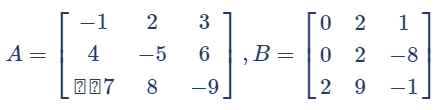

In [1]:
import numpy as np
a_ndarray = np.array([[-1, 2, 3], [4, -5, 6], [7, 8, -9]])
b_ndarray = np.array([[0, 2, 1], [0, 2, -8], [2, 9, -1]])

【問題1】行列積を手計算する

$A \times B=\begin{bmatrix}
-1 & 2 & 3 \\
4 & -5 & 6 \\
7 & 8 & -9 \\
\end{bmatrix} \times
\begin{bmatrix}
0 & 2 & 1 \\
0 & 2 & -8 \\
2 & 9 & -1 \\
\end{bmatrix}$

$=\begin{bmatrix}
(-1\cdot0)+(2\cdot0)+(3\cdot2) & (-1\cdot2)+(2\cdot2)+(3\cdot9) & (-1\cdot1)+(2\cdot-8)+(3\cdot-1) \\
(4\cdot0)+(-5\cdot0)+(6\cdot2) & (4\cdot2)+(-5\cdot2)+(6\cdot9) & (4\cdot1)+(-5\cdot-8)+(6\cdot-1) \\
(7\cdot0)+(8\cdot0)+(-9\cdot2) & (7\cdot2)+(8\cdot2)+(-9\cdot9) & (7\cdot1)+(8\cdot-8)+(-9\cdot-1) \\
\end{bmatrix}$

$=
\begin{bmatrix}
0+0+6 & -2+4+27 & -1+-16+-3 \\
0+0+12 & 8+-10+54 & 4+40-6 \\
0+0-18 & 14+16-81 & 7+-64+9 \\
\end{bmatrix} =\begin{bmatrix}
6 & 29 & -20 \\
12 & 52 & 38 \\
-18 & -51 & -48 \\
\end{bmatrix}$



【問題2】NumPyの関数による計算  
2次元配列の行列積：**推奨**  np.matmul()や@演算子  
※np.matmul()とnp.dot()は3次元以上の配列で挙動が違う

In [2]:
np.matmul(a_ndarray,b_ndarray)

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

In [3]:
a_ndarray@b_ndarray

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

In [4]:
np.dot(a_ndarray,b_ndarray)

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

# 行列積のスクラッチ実装
※スクラッチ開発：システム開発の雛形であるパッケージなどを利用せず、1からオリジナルのシステムを開発すること

【問題3】ある要素の計算を実装  
$$\sum_{k=0}^2 a_{0,k}b_{k,0}$$

In [9]:
a =a_ndarray
b=b_ndarray

val=0
for k in range(3):
    val+=a[0,k]*b[k,0]
val

6

【問題4】行列積を行う関数の作成
$$c_i,j=\sum_{k=0}^2 a_{i,k}b_{k,j}$$

In [36]:
def matrix(a,b):
    ans=[]
    for i in range(len(a[:,0])):
        row=[]
        for j in range(len(b[0])):
            val=0
            for k in range(3):
                val+=a[i,k]*b[k,j]
            row.append(val)
        ans.append(row)
    return np.array(ans)

In [37]:
ans = matrix(a_ndarray,b_ndarray)
ans,type(ans)

(array([[  6,  29, -20],
        [ 12,  52,  38],
        [-18, -51, -48]]),
 numpy.ndarray)

 # 行列積が定義されない組み合わせの行列

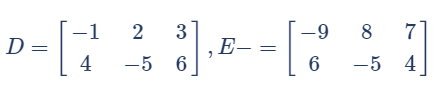

In [35]:
d_ndarray = np.array([[-1, 2, 3], [4, -5, 6]])
e_ndarray = np.array([[-9, 8, 7], [6, -5, 4]])

【問題5】計算が定義されない入力を判定する

In [44]:
def matrixA(a,b):
    A=len(a[:,0])
    B=len(b[0])
    if A != B:
        return print("<ERROR>行列積ができない行列の組み合わせです。最初の行列の列数と次の行列の行数が等しくありません")
        
    ans=[]
    for i in range(len(a[:,0])):
        row=[]
        for j in range(len(b[0])):
            val=0
            for k in range(3):
                val+=a[i,k]*b[k,j]
            row.append(val)
        ans.append(row)
    return np.array(ans)

In [45]:
matrixA(d_ndarray,e_ndarray)

<ERROR>行列積ができない行列の組み合わせです。最初の行列の列数と次の行列の行数が等しくありません


【問題6】転置
np.transpose()や.Tアトリビュートで計算

In [46]:
matrixA(d_ndarray,np.transpose(e_ndarray))

array([[ 46,  -4],
       [-34,  73]])

In [47]:
matrixA(d_ndarray,e_ndarray.T)

array([[ 46,  -4],
       [-34,  73]])